# 📊 **Customer Churn Prediction – Telecom Sector**

**Project Type**: Machine Learning (Classification)  

This notebook presents a complete machine learning pipeline to predict telecom customer churn. Various models are evaluated including Logistic Regression, KNN, Decision Trees, Random Forests, AdaBoost, Naive Bayes, and Neural Networks.


# **Telecommunications Industry - Customer Churn Predition**

**Business Problem Statement**

In the competitive telecommunications industry, customer churn is a significant issue that affects revenue and profitability. When customers leave for competitors, it results in lost income and higher acquisition costs to replace them. Therefore, understanding the factors that lead to churn and predicting which customers are at risk is essential for telecom companies to maintain a stable customer base. By analyzing customer data—such as demographics, service usage patterns, and billing behavior—telecom providers can identify at-risk customers before they leave.

A predictive churn model enables companies to implement proactive retention strategies, such as personalized offers and enhanced customer service, aimed at reducing churn. This not only minimizes revenue loss but also strengthens customer loyalty and satisfaction. Ultimately, reducing churn leads to long-term financial benefits and improves a company’s competitive position in the market.


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Dataset
# https://www.kaggle.com/datasets/mazenalattar/telco-customer-churn/code?datasetId=5725168

from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['Telco-churn.csv']))

Saving Telco-churn.csv to Telco-churn.csv


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Exploratory Data Analysis (EDA)

In [ ]:
# Check the shape of the dataset
data.shape

(7043, 21)

In [ ]:
# Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Dropping unwanted variables which has no value in the analysis:

data = data.drop(['customerID'], axis=1)

In [ ]:
# Convert 'TotalCharges' to numeric, invalid parsing will be set as NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
# Assess if there are any missing values

data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


<Axes: >

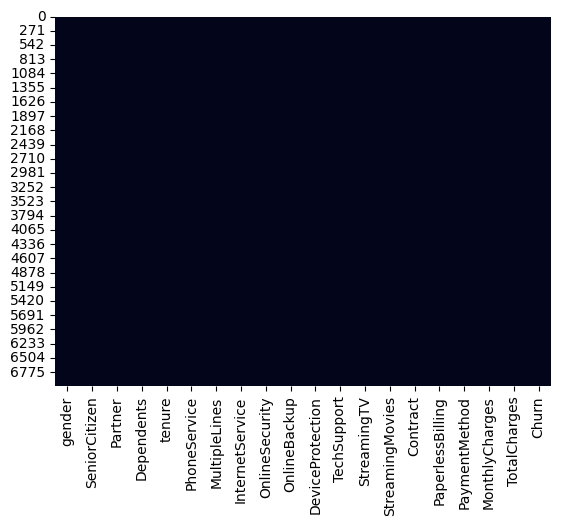

In [ ]:
sns.heatmap(data.isnull(), cbar=False)

In [ ]:
# Handling missing values: Let's fill 'TotalCharges' NaNs with the mean of the column

data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [ ]:
# Convert the 'Churn' column to binary (Yes = 1, No = 0)

data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Comprehensive Analysis

# 1. Customer Distribution
total_customers = data.shape[0]
churned_customers_count = data[data['Churn'] == 1].shape[0]
non_churned_customers_count = data[data['Churn'] == 0].shape[0]
churn_rate = churned_customers_count / total_customers * 100

# 2. Revenue Overview
total_revenue = data['MonthlyCharges'].sum()
churned_revenue = data[data['Churn'] == 1]['MonthlyCharges'].sum()
non_churned_revenue = data[data['Churn'] == 0]['MonthlyCharges'].sum()
avg_monthly_charges = data['MonthlyCharges'].mean()
median_monthly_charges = data['MonthlyCharges'].median()
min_monthly_charges = data['MonthlyCharges'].min()
max_monthly_charges = data['MonthlyCharges'].max()

# 3. Tenure Analysis
avg_tenure = data['tenure'].mean()
churned_avg_tenure = data[data['Churn'] == 1]['tenure'].mean()
non_churned_avg_tenure = data[data['Churn'] == 0]['tenure'].mean()

# 4. Service Usage (Example: InternetService)
internet_service_impact = data.groupby('InternetService')['Churn'].mean()

# Output the results
print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers_count} ({churn_rate:.2f}%)")
print(f"Non-Churned Customers: {non_churned_customers_count}")

print(f"\nTotal Revenue: ${total_revenue:.2f}")
print(f"Revenue from Churned Customers: ${churned_revenue:.2f}")
print(f"Revenue from Non-Churned Customers: ${non_churned_revenue:.2f}")
print(f"Average Monthly Charges: ${avg_monthly_charges:.2f}")
print(f"Median Monthly Charges: ${median_monthly_charges:.2f}")
print(f"Min Monthly Charges: ${min_monthly_charges:.2f}")
print(f"Max Monthly Charges: ${max_monthly_charges:.2f}")

print(f"\nAverage Tenure: {avg_tenure:.2f} months")
print(f"Average Tenure of Churned Customers: {churned_avg_tenure:.2f} months")
print(f"Average Tenure of Non-Churned Customers: {non_churned_avg_tenure:.2f} months")

print(f"\nChurn Rate by Internet Service:")
print(internet_service_impact)


Total Customers: 7043
Churned Customers: 1869 (26.54%)
Non-Churned Customers: 5174

Total Revenue: $456116.60
Revenue from Churned Customers: $139130.85
Revenue from Non-Churned Customers: $316985.75
Average Monthly Charges: $64.76
Median Monthly Charges: $70.35
Min Monthly Charges: $18.25
Max Monthly Charges: $118.75

Average Tenure: 32.37 months
Average Tenure of Churned Customers: 17.98 months
Average Tenure of Non-Churned Customers: 37.57 months

Churn Rate by Internet Service:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64


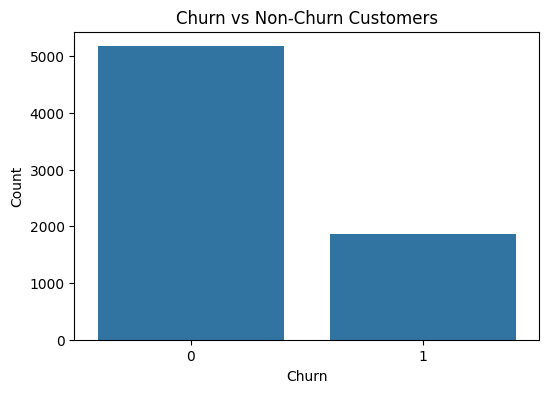

In [ ]:
# Explore the distribution of the target variable

# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn vs Non-Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

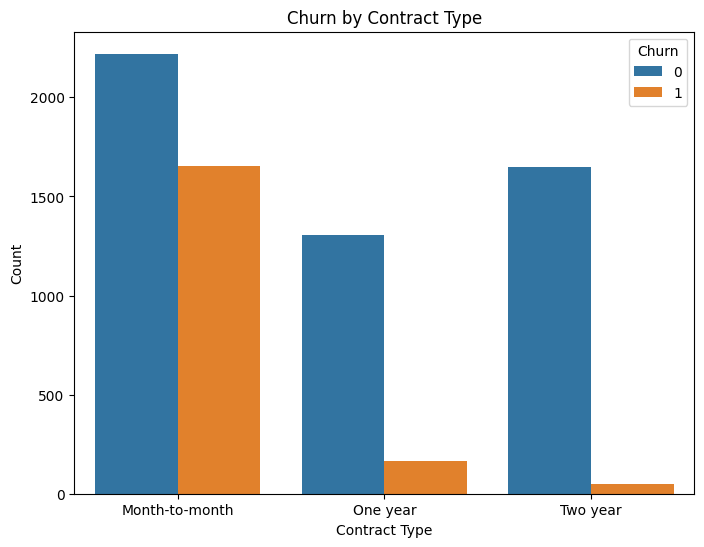

In [ ]:
# Churn by Contract Type:

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

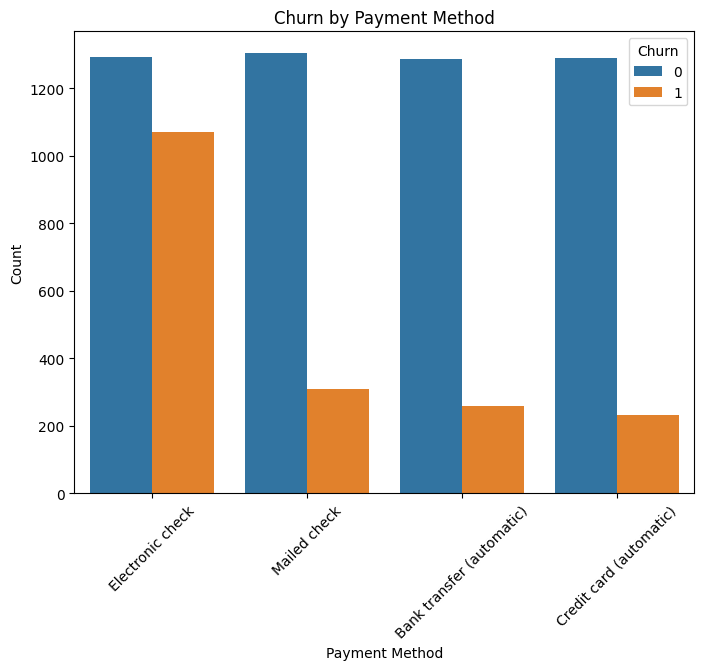

In [ ]:
# Churn by Payment Method

plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

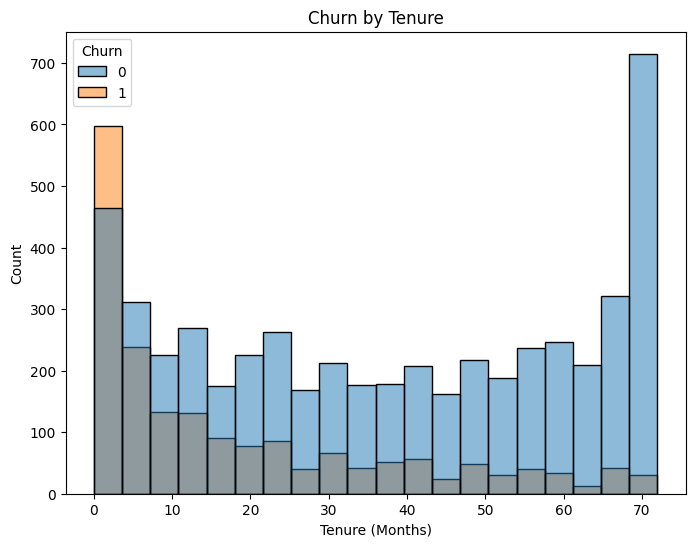

In [ ]:
#Churn by Tenure

plt.figure(figsize=(8, 6))
sns.histplot(x='tenure', hue='Churn', data=data, bins=20, kde=False)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

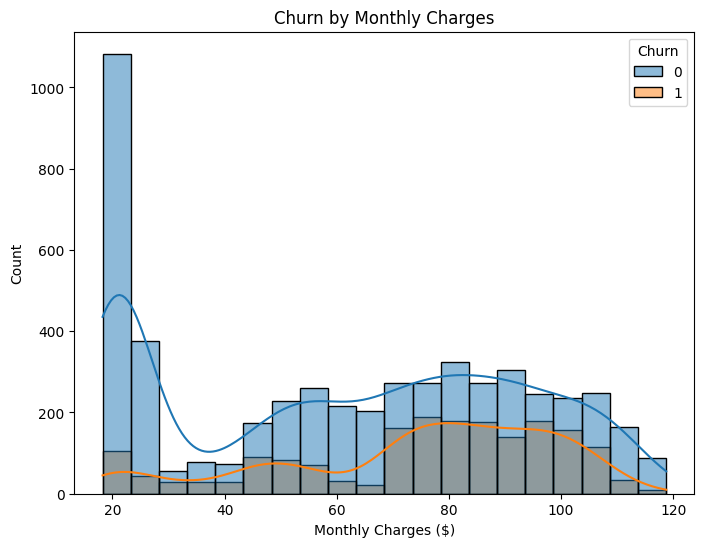

In [ ]:
# Churn by Monthly Charges

plt.figure(figsize=(8, 6))
sns.histplot(x='MonthlyCharges', hue='Churn', data=data, bins=20, kde=True)
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()

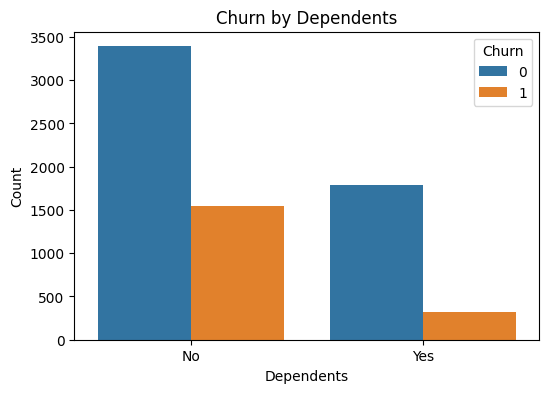

In [ ]:
# Churn by Dependents
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


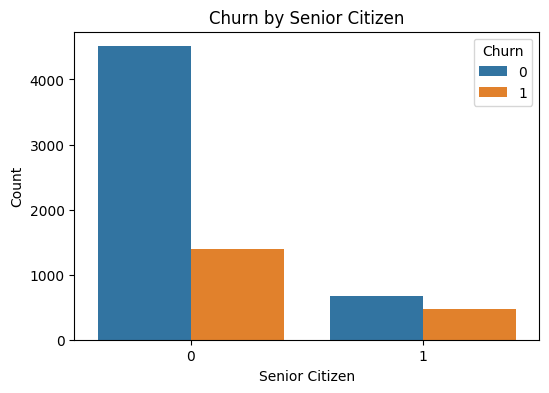

In [ ]:
# Churn by Senior Citizen
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [ ]:
# Converting categorical columns to one-hot encoded variables

data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Display the first few rows after preprocessing to verify

data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Summary statistics

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


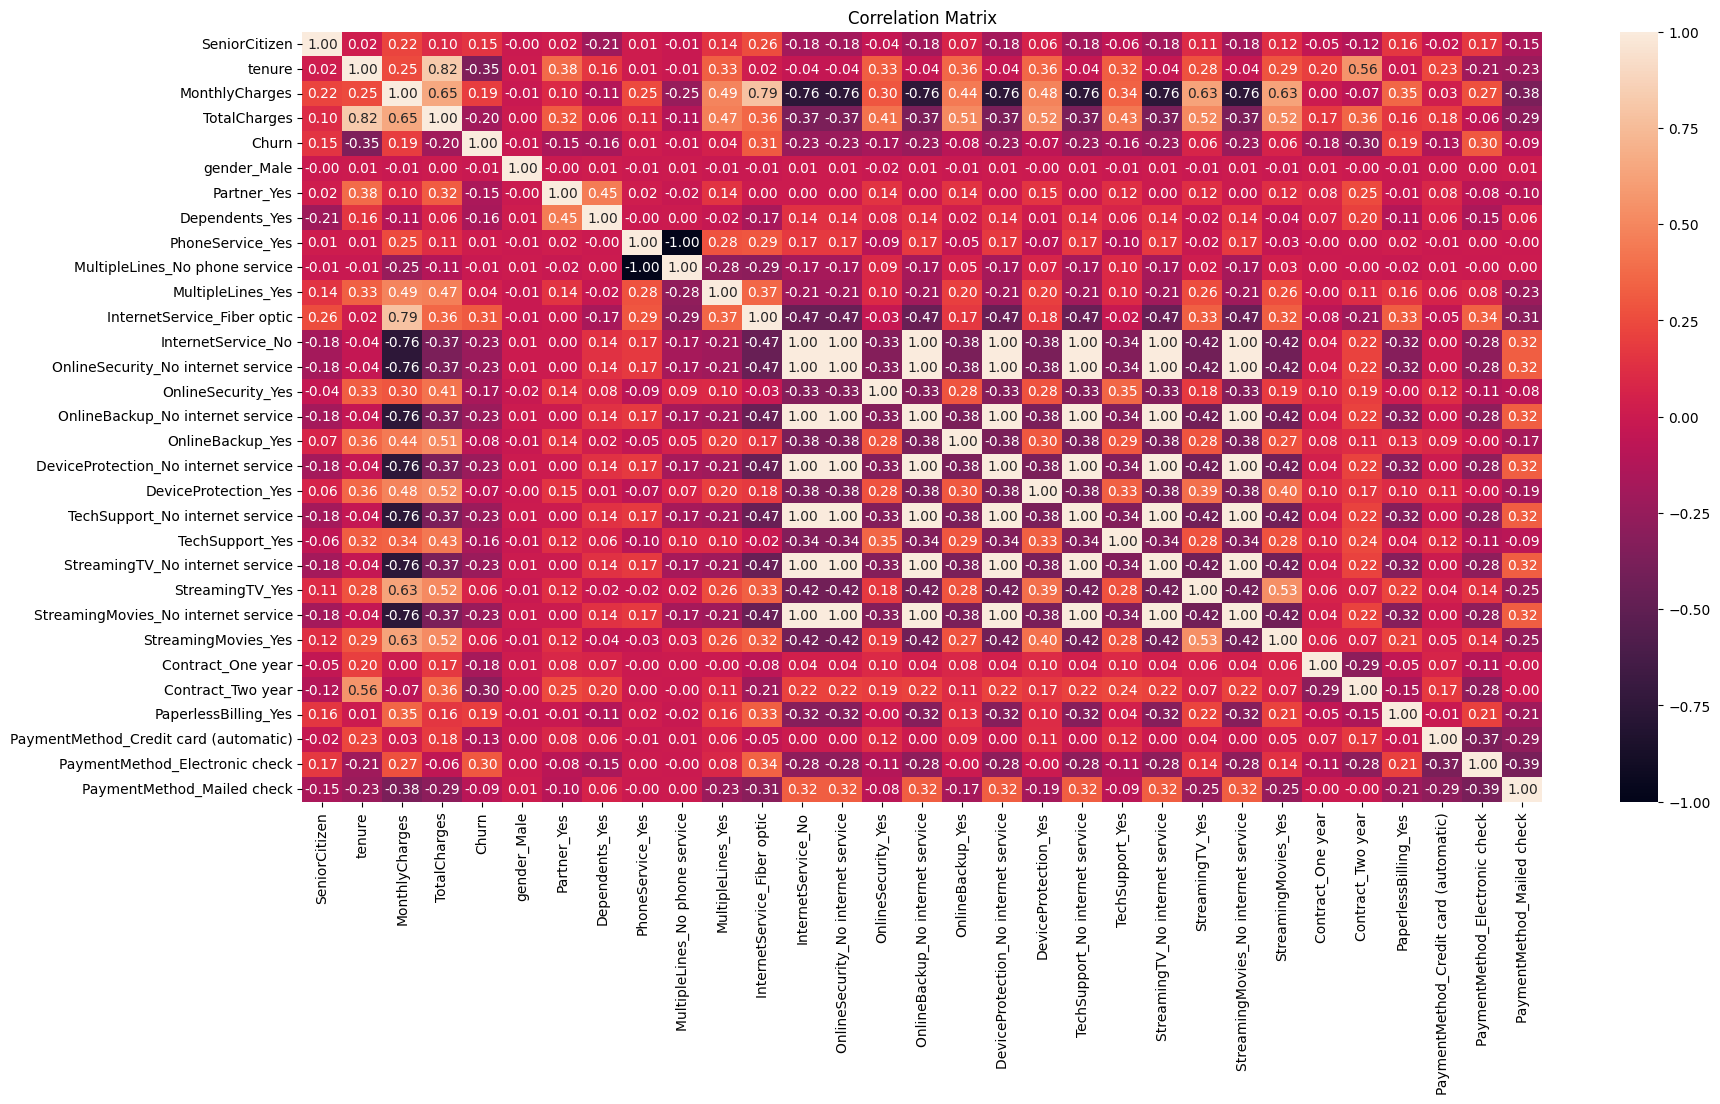

In [ ]:
# Correlation Analysis
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

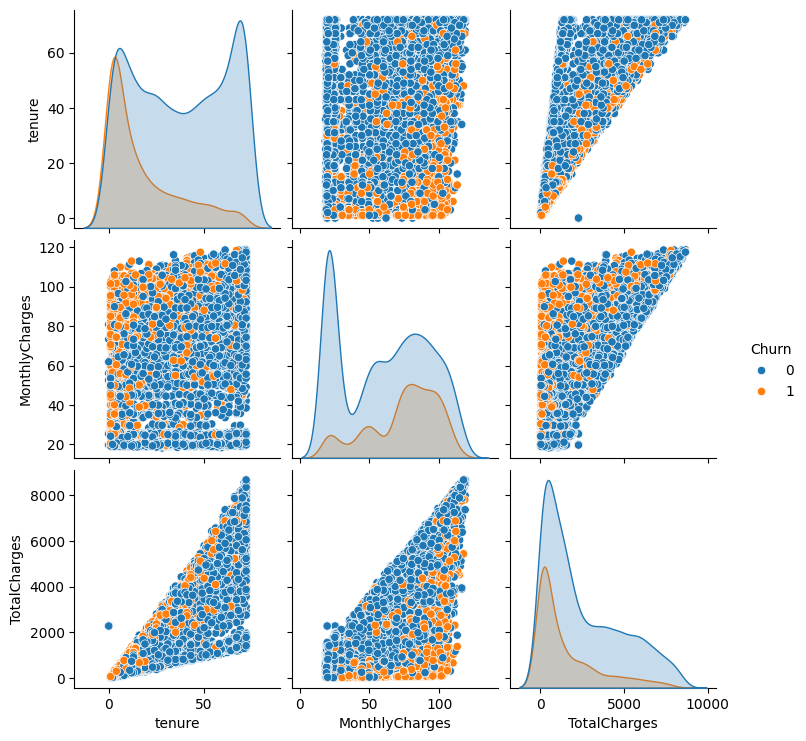

In [ ]:
# Explore data using pairplot

sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

In [ ]:
# Splitting the data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Rescale the data
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

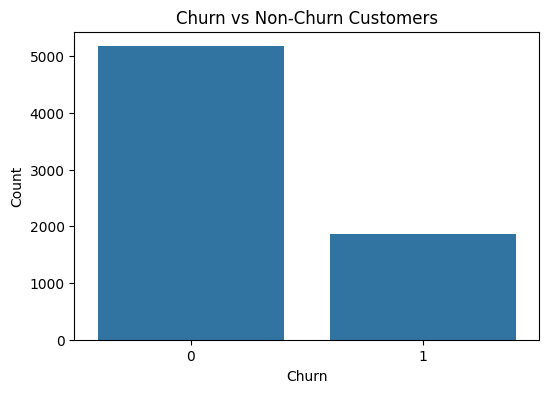

In [ ]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn vs Non-Churn Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

## 6. Logistic Regression

In [ ]:
# Logistic Regression Model

logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train_scaled,y_train)

y_pred_log = logmodel.predict(X_test_scaled)

In [ ]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log)
print("Classification Report for Logistic Regression:\n", class_report_log)

Confusion Matrix for Logistic Regression:
 [[1403  182]
 [ 222  306]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



In [ ]:
# Calculate ROC AUC
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test_scaled)[:,1])
print(f"ROC AUC : {logit_roc_auc:.2f}")

ROC AUC : 0.86


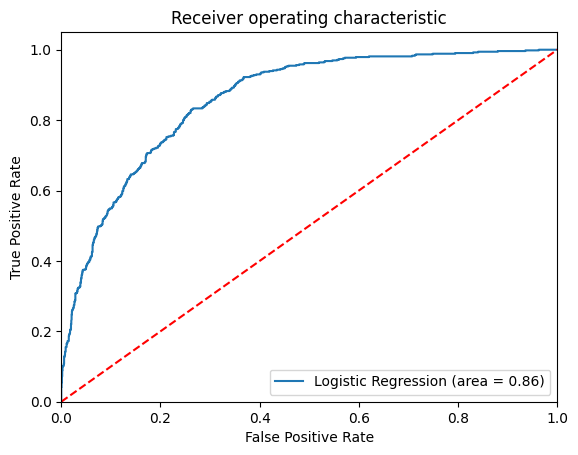

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 7. K-Nearest Neighbors (KNN)

In [ ]:
# Develop a kNN model to predict churn occurrence using k = 5
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
# Confusion Matrix and Classification Report
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nConfusion Matrix for KNN Model:\n", conf_matrix_knn)
print("\nClassification Report for KNN Model:\n", class_report_knn)


Confusion Matrix for KNN Model:
 [[1322  263]
 [ 221  307]]

Classification Report for KNN Model:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1585
           1       0.54      0.58      0.56       528

    accuracy                           0.77      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.78      0.77      0.77      2113



In [ ]:
# Predictions using probabilities for class 1 (Churn)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# ROC-AUC score calculation
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"ROC AUC : {roc_auc_knn:.2f}")

ROC AUC : 0.80


In [ ]:
# Determine the optimal value of k based on ROC AUC using cross-validation
max_K = 100
cv_scores = []

for K in range(1, max_K):
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="roc_auc")
    cv_scores.append(scores.mean())


<Axes: >

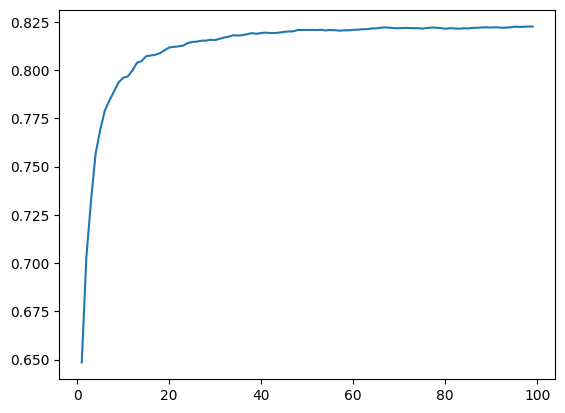

In [ ]:
# Display graph
sns.lineplot(x=range(1,max_K), y=cv_scores)

In [ ]:
cv_scores[:8]

[0.6485365194253709,
 0.703030158307252,
 0.7320261160117026,
 0.7565004919736504,
 0.7688790929908048,
 0.7789170567883016,
 0.7841977859045157,
 0.7888716336665816]

In [ ]:
# Find the index of the maximum ROC AUC value
optimal_k_index = np.argmax(cv_scores)

# Retrieve the optimal k value
optimal_k = optimal_k_index + 1  # Adding 1 because K ranges from 1 to max_K, not from 0 to max_K-1

# Retrieve the maximum ROC AUC value
max_roc_auc = cv_scores[optimal_k_index]

# Print the results
print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)

Optimal k for maximum ROC AUC: 98
Maximum ROC AUC: 0.8225503678583624


# **Optimized kNN model with K=98**

In [ ]:
knn_optimized = KNeighborsClassifier(n_neighbors=98, metric='euclidean')

knn_optimized.fit(X_train_scaled, y_train)

y_pred_knn_opt = knn_optimized.predict(X_test_scaled)

conf_matrix_knn_opt = confusion_matrix(y_test, y_pred_knn_opt)
class_report_knn_opt = classification_report(y_test, y_pred_knn_opt)
print("\nConfusion Matrix for Optimized KNN Model (k=98):\n", conf_matrix_knn_opt)
print("\nClassification Report for Optimized KNN Model (k=98):\n", class_report_knn_opt)


Confusion Matrix for Optimized KNN Model (k=98):
 [[1373  212]
 [ 213  315]]

Classification Report for Optimized KNN Model (k=98):
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1585
           1       0.60      0.60      0.60       528

    accuracy                           0.80      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [ ]:
# Ppredicted probabilities for class 1 (Churn)
y_pred_proba_knn_opt = knn_optimized.predict_proba(X_test_scaled)[:, 1]

# Now calculate the ROC-AUC score using the probabilities for the positive class (Churn)
roc_auc_knn_opt = roc_auc_score(y_test, y_pred_proba_knn_opt)

# Print the ROC AUC score
print('ROC AUC: ', roc_auc_knn_opt)

ROC AUC:  0.8482494503393557


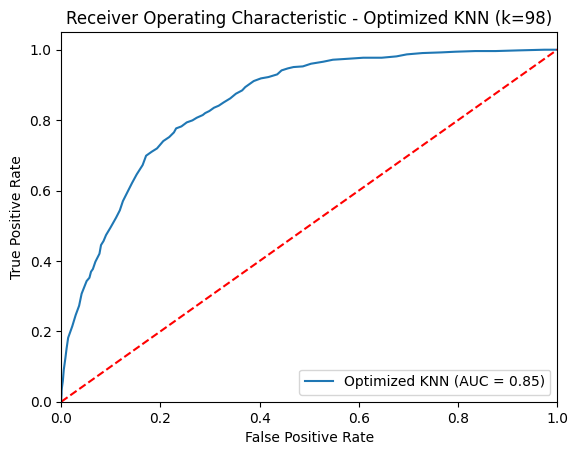

In [ ]:
#: ROC Curve Plot

fpr_knn_opt, tpr_knn_opt, thresholds_knn_opt = roc_curve(y_test, y_pred_proba_knn_opt)
plt.figure()
plt.plot(fpr_knn_opt, tpr_knn_opt, label='Optimized KNN (AUC = %0.2f)' % roc_auc_knn_opt)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Optimized KNN (k=98)')
plt.legend(loc="lower right")
plt.show()


## 8. Decision Tree

In [ ]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred_dt = dt_model.predict(X_test_scaled)

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree Model:\n", conf_matrix_dt)
print("\nClassification Report for Decision Tree Model:\n", class_report_dt)


Confusion Matrix for Decision Tree Model:
 [[1474  111]
 [ 305  223]]

Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1585
           1       0.67      0.42      0.52       528

    accuracy                           0.80      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
# ROC-AUC calculation
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
dt_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

# Print ROC AUC score
print(f"ROC AUC: {dt_roc_auc:.2f}")

ROC AUC: 0.82


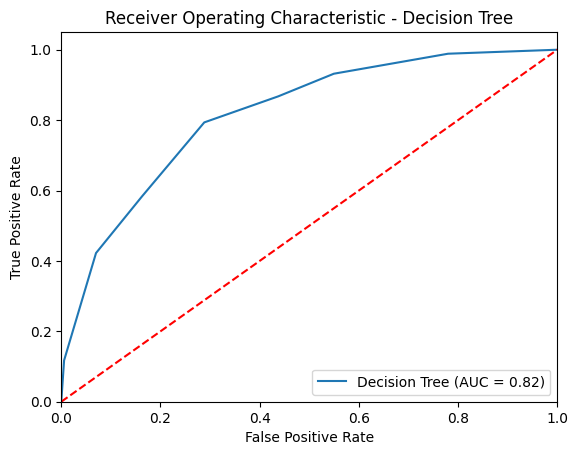

In [ ]:
#ROC Curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.show()

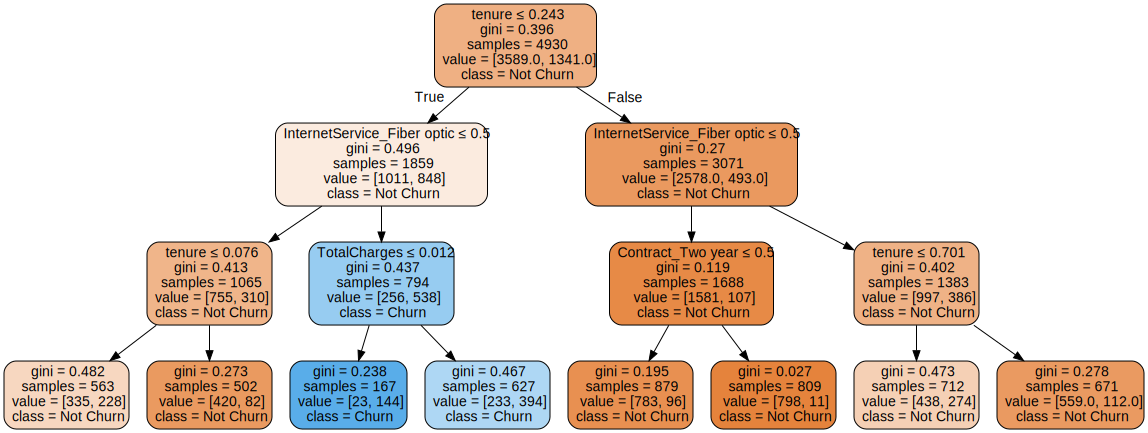

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dt_model, out_file=None,
                      feature_names=X.columns,
                      class_names=['Not Churn','Churn'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph


## 9. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train_scaled,y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# Confusion Matrix and Classification Report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:\n", conf_matrix_rf)
print("\nClassification Report for Random Forest:\n", class_report_rf)


Confusion Matrix for Random Forest:
 [[1474  111]
 [ 291  237]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1585
           1       0.68      0.45      0.54       528

    accuracy                           0.81      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.80      0.81      0.80      2113



In [ ]:
# ROC-AUC calculation using predict_proba for class 1 (Churn)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Print ROC AUC score
print(f"ROC AUC: {rf_roc_auc:.2f}")

ROC AUC: 0.86


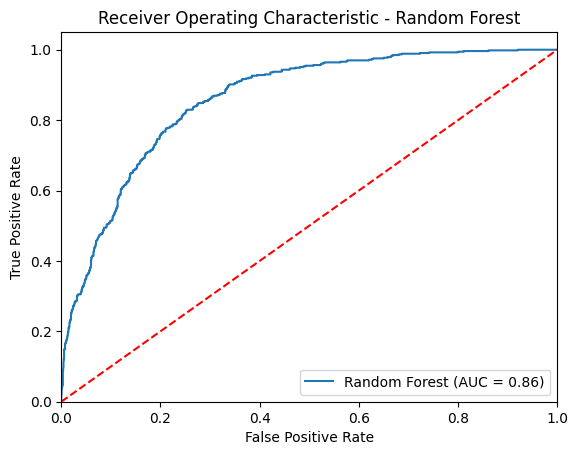

In [ ]:
# ROC Curve

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

## 10. AdaBoost

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test_scaled)

In [ ]:
# Confusion Matrix and Classification Report
conf_matrix_bt = confusion_matrix(y_test, y_pred_bt)
class_report_bt = classification_report(y_test, y_pred_bt)
print("\nConfusion Matrix for Boosted Tree:\n", conf_matrix_bt)
print("\nClassification Report for Boosted Tree:\n", class_report_bt)


Confusion Matrix for Boosted Tree:
 [[1332  253]
 [ 452   76]]

Classification Report for Boosted Tree:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1585
           1       0.23      0.14      0.18       528

    accuracy                           0.67      2113
   macro avg       0.49      0.49      0.48      2113
weighted avg       0.62      0.67      0.64      2113



In [ ]:
# ROC-AUC calculation using predict_proba for class 1 (Churn)
y_pred_proba_bt = bt_model.predict_proba(X_test_scaled)[:, 1]
bt_roc_auc = roc_auc_score(y_test, y_pred_proba_bt)

# Print ROC AUC score
print(f"ROC AUC: {bt_roc_auc:.2f}")

ROC AUC: 0.47


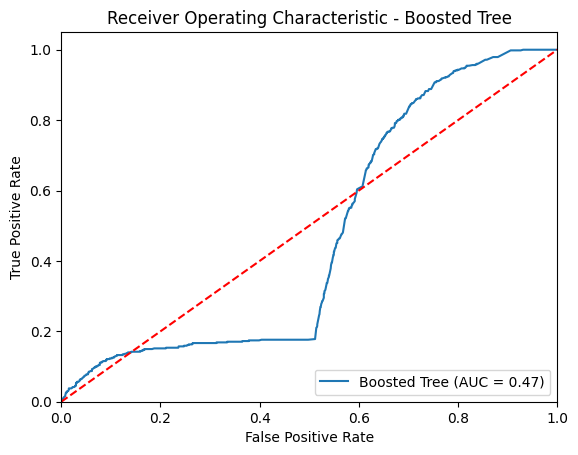

In [ ]:
# ROC Curve

bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, y_pred_proba_bt)
plt.figure()
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (AUC = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Boosted Tree')
plt.legend(loc="lower right")
plt.show()

## 11. Naive Bayes

In [ ]:
X.loc[:, X.isnull().any()].columns

Index([], dtype='object')

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

In [ ]:
# Confusion Matrix and Classification Report
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)
print("\nConfusion Matrix for Naive Bayes Model:\n", conf_matrix_nb)
print("\nClassification Report for Naive Bayes:\n", class_report_nb)


Confusion Matrix for Naive Bayes Model:
 [[942 643]
 [ 52 476]]

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1585
           1       0.43      0.90      0.58       528

    accuracy                           0.67      2113
   macro avg       0.69      0.75      0.65      2113
weighted avg       0.82      0.67      0.69      2113



In [ ]:
# ROC-AUC calculation using predict_proba for class 1 (Churn)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
nb_roc_auc = roc_auc_score(y_test, y_pred_proba_nb)

# Print ROC AUC score
print(f"ROC AUC: {nb_roc_auc:.2f}")

ROC AUC: 0.83


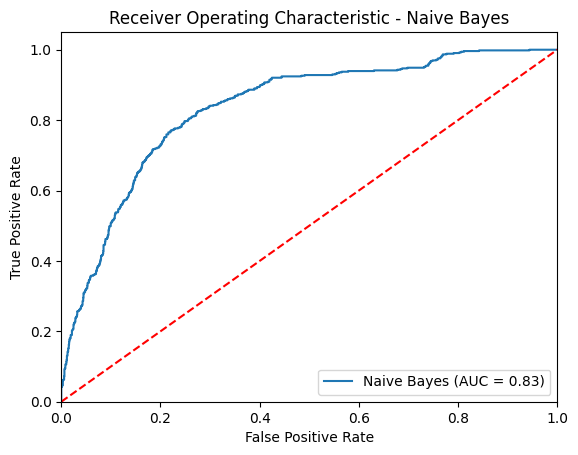

In [ ]:
# Plotting ROC Curve
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, y_pred_proba_nb)
plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## 12. Artificial Neural Network (MLP)

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=20, random_state=1)

In [ ]:
y_pred_mlpc = MLPC_model.predict(X_test_scaled)

In [ ]:
MLPC_model.fit(X_train_scaled, y_train)

# Evaluate the model
print("\nConfusion_matrix for ANN:\n", confusion_matrix(y_test, y_pred_mlpc))
print("\nClassification Report for ANN:\n", classification_report(y_test, y_pred_mlpc))


Confusion_matrix for ANN:
 [[1410  175]
 [ 222  306]]

Classification Report for ANN:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1585
           1       0.64      0.58      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [ ]:
# ROC AUC score
roc_auc_mlpc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test_scaled)[:, 1])
print('ROC AUC: ', roc_auc_mlpc)

ROC AUC:  0.8587396042443363


In [ ]:
min_hidden_layer_size = 5
max_hidden_layer_size = 30
cv_scores = []

# Loop to find the best hidden layer size using cross-validation
for s in range(min_hidden_layer_size, max_hidden_layer_size, 1):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model, X_train_scaled, y_train.values.ravel(), cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

<Axes: >

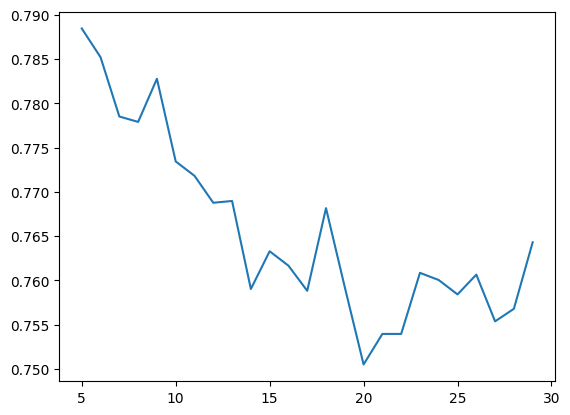

In [ ]:
# Plot to visualize the accuracy for different hidden nodes

sns.lineplot(x=range(min_hidden_layer_size, max_hidden_layer_size, 1), y=cv_scores)

In [ ]:
# Find the optimal number of hidden nodes
optimal_nodes_index = np.argmax(cv_scores)
optimal_nodes = min_hidden_layer_size + optimal_nodes_index  # Get the optimal number of hidden nodes
optimal_accuracy = cv_scores[optimal_nodes_index]

print(f'Optimal Number of Hidden Nodes: {optimal_nodes}')
print(f'Accuracy with Optimal Number of Hidden Nodes: {optimal_accuracy}')

Optimal Number of Hidden Nodes: 5
Accuracy with Optimal Number of Hidden Nodes: 0.7884381338742393


In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=optimal_nodes, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print("\nConfusion_matrix for ANN:\n" ,confusion_matrix(y_test,y_pred_mlpc))
print("\nClassification Report for ANN:\n" ,classification_report(y_test,y_pred_mlpc))


Confusion_matrix for ANN:
 [[1414  171]
 [ 244  284]]

Classification Report for ANN:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.62      0.54      0.58       528

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.80      0.80      0.80      2113



In [ ]:
# ROC AUC score for the ANN model
roc_auc_mlpc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test_scaled)[:, 1])
print('ROC AUC: ', roc_auc_mlpc)

ROC AUC:  0.8218860529586083


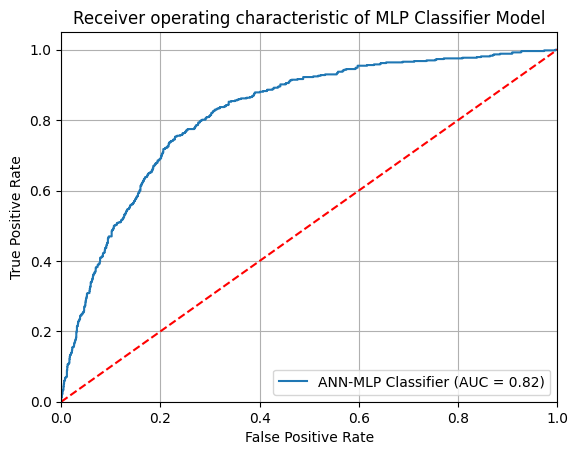

In [ ]:
# ROC Curve for the ANN model
fpr_mlpc, tpr_mlpc, thresholds_mlpc = roc_curve(y_test, MLPC_model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve for the ANN model
plt.figure()
plt.plot(fpr_mlpc, tpr_mlpc, label='ANN-MLP Classifier (AUC = %0.2f)' % roc_auc_mlpc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of MLP Classifier Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 13. Model Performance Comparison

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Create a function to extract classification metrics (Precision, Recall, F1-Score, Accuracy)
def get_classification_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)  # Adding accuracy calculation
    return {
        'Model': model_name,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'Accuracy': accuracy,
    }

# Prepare a list to store results
results = []

# Logistic Regression
y_pred_log = logmodel.predict(X_test_scaled)
roc_auc_log = roc_auc_score(y_test, logmodel.predict_proba(X_test_scaled)[:, 1])
log_metrics = get_classification_metrics(y_test, y_pred_log, "Logistic Regression")
log_metrics['ROC AUC'] = roc_auc_log
results.append(log_metrics)

# Optimized KNN
y_pred_knn_opt = knn_optimized.predict(X_test_scaled)
roc_auc_knn = roc_auc_score(y_test, knn_optimized.predict_proba(X_test_scaled)[:, 1])
knn_metrics = get_classification_metrics(y_test, y_pred_knn_opt, "Optimized KNN")
knn_metrics['ROC AUC'] = roc_auc_knn
results.append(knn_metrics)

# Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
dt_metrics = get_classification_metrics(y_test, y_pred_dt, "Decision Tree")
dt_metrics['ROC AUC'] = roc_auc_dt
results.append(dt_metrics)

# Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
rf_metrics = get_classification_metrics(y_test, y_pred_rf, "Random Forest")
rf_metrics['ROC AUC'] = roc_auc_rf
results.append(rf_metrics)

# Boosted Tree (AdaBoost)
y_pred_bt = bt_model.predict(X_test_scaled)
roc_auc_bt = roc_auc_score(y_test, bt_model.predict_proba(X_test_scaled)[:, 1])
bt_metrics = get_classification_metrics(y_test, y_pred_bt, "Boosted Tree")
bt_metrics['ROC AUC'] = roc_auc_bt
results.append(bt_metrics)

# Naive Bayes
y_pred_nb = nb_model.predict(X_test_scaled)
roc_auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
nb_metrics = get_classification_metrics(y_test, y_pred_nb, "Naive Bayes")
nb_metrics['ROC AUC'] = roc_auc_nb
results.append(nb_metrics)

# ANN Model (Using the trained model with optimal nodes)
y_pred_mlpc = MLPC_model.predict(X_test_scaled)
roc_auc_mlpc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test_scaled)[:, 1])
mlpc_metrics = get_classification_metrics(y_test, y_pred_mlpc, "ANN")
mlpc_metrics['ROC AUC'] = roc_auc_mlpc
results.append(mlpc_metrics)

# Convert the results to a pandas DataFrame
summary_df = pd.DataFrame(results)

# Display the summary table
print(summary_df)


                 Model  Precision    Recall  F1-Score  Accuracy   ROC AUC
0  Logistic Regression   0.627049  0.579545  0.602362  0.808803  0.858854
1        Optimized KNN   0.597723  0.596591  0.597156  0.798864  0.848249
2        Decision Tree   0.667665  0.422348  0.517401  0.803124  0.815523
3        Random Forest   0.681034  0.448864  0.541096  0.809749  0.858554
4         Boosted Tree   0.231003  0.143939  0.177363  0.666351  0.471776
5          Naive Bayes   0.425380  0.901515  0.578021  0.671084  0.834675
6                  ANN   0.556478  0.634470  0.592920  0.782300  0.821886


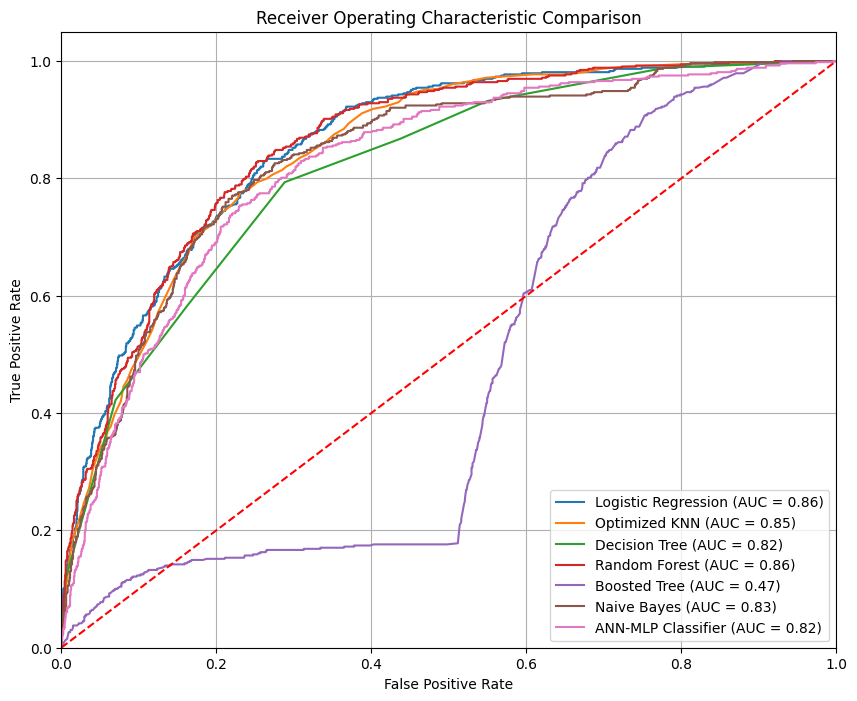

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test_scaled)[:, 1])
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logmodel.predict_proba(X_test_scaled)[:, 1])

# Optimized k-Nearest Neighbors (k=98)
kNN_roc_auc = roc_auc_score(y_test, knn_optimized.predict_proba(X_test_scaled)[:, 1])
fpr_knn_opt, tpr_knn_opt, thresholds_knn_opt = roc_curve(y_test, knn_optimized.predict_proba(X_test_scaled)[:, 1])

# Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])

# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Boosted Tree (AdaBoost)
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test_scaled)[:, 1])
fpr_bt, tpr_bt, thresholds_bt = roc_curve(y_test, bt_model.predict_proba(X_test_scaled)[:, 1])

# Naive Bayes
nb_roc_auc = roc_auc_score(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])

# ANN (MLPClassifier) - Use the trained ANN model
mlpc_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test_scaled)[:, 1])
fpr_mlpc, tpr_mlpc, thresholds_mlpc = roc_curve(y_test, MLPC_model.predict_proba(X_test_scaled)[:, 1])

# Plotting all ROC curves together
plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
plt.plot(fpr_knn_opt, tpr_knn_opt, label='Optimized KNN (AUC = %0.2f)' % kNN_roc_auc)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % dt_roc_auc)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(fpr_bt, tpr_bt, label='Boosted Tree (AUC = %0.2f)' % bt_roc_auc)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % nb_roc_auc)
plt.plot(fpr_mlpc, tpr_mlpc, label='ANN-MLP Classifier (AUC = %0.2f)' % mlpc_roc_auc)

# Diagonal line representing random chance
plt.plot([0, 1], [0, 1], 'r--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.grid()

# Show the combined ROC curve plot
plt.show()


# **Key Observations**

**Best Overall Model:**
* Logistic Regression is the most balanced model, performing well in all metrics, including precision, recall, F1-score, and ROC AUC.
Random Forest is another strong option, especially if precision is critical.

**Best for Precision:**
- Random Forest has the highest precision (0.681), making it ideal if you want fewer false positives. This is especially useful when incorrectly predicting churn could lead to unnecessary costs.


**Best for Recall:**
- Naive Bayes has the highest recall (0.902), meaning it is best at capturing the actual churners. However, it suffers from low precision, meaning it tends to generate more false positives.

**Boosted Tree:**
- Boosted Tree performs poorly in all metrics, especially with a low ROC AUC (0.472). This model is not effective for this dataset.

**Final Model Recommendation:**

- **Logistic Regression** remains the best overall model for its balanced performance across precision, recall, F1-score, and ROC AUC.

- **Random Forest** is a strong alternative if precision is the primary goal.
